# Exercício 1: k-NN

*Execute todos os procedimentos a seguir. Neste arquivo estão as chamadas para as funções que você deverá implementar. *

O funcionamento do k-NN ocorre em duas etapas: 

- Durante o treinamento, o k-NN armazena todas as instâncias de treino.
- Durante o teste, o k-NN classifica cada instância de teste comparando a todas as imagens de treinamento. A classe é atribuída de acordo com as k instâncias mais próximas. 

Neste exercício você deverá entender o protocolo básico de classificação de imagens e o funcionamento do k-NN.

In [1]:
# Algumas configurações necessárias

import random
import numpy as np
from rncvc.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# Configura as plotagens usando o matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Permite a recarga automática de arquivos python importados
# dúvidas veja: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Abre os dados .
cifar10_dir = 'rncvc/datasets/cifar-10-batches-py'
X_train, y_train, X_valid, y_valid = load_CIFAR10(cifar10_dir)

# Conferência da abertura das imagens
print 'X (dados)   treino shape: ', X_train.shape
print 'y (classes) treino shape: ', y_train.shape
print 'X (dados)   valid. shape: ', X_valid.shape
print 'y (classes) valid. shape: ', y_valid.shape

X (dados)   treino shape:  (40000, 32, 32, 3)
y (classes) treino shape:  (40000,)
X (dados)   valid. shape:  (10000, 32, 32, 3)
y (classes) valid. shape:  (10000,)


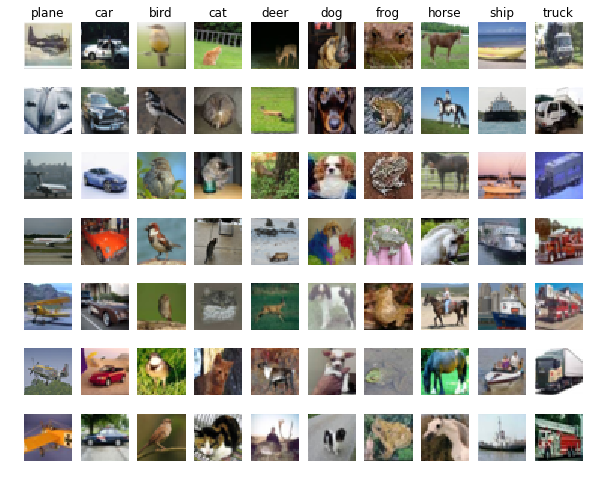

In [3]:
# Visualização de alguns exemplos do dataset
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# Para evitarmos sobrecarga computacional 
# vamos amostrar algumas instâncias para treinamento

num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_valid = X_valid[mask]
y_valid = y_valid[mask]

In [5]:
# Estica as imagens 2D para 1D 
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], -1))
print X_train.shape, X_valid.shape

(5000, 3072) (500, 3072)


In [6]:
from rncvc.classifiers import KNN

# chamada do k-NN 
# Lembre-se que o treinamento do k-NN é "lazy", ou seja,
# o classificador apenas precisa "memorizar" os dados de treinamento
classifier = KNN()
classifier.train(X_train, y_train)

Agora vamos efetuar predições com base nas instâncias de teste. Relembrando: 

1. Calcular as distâncias entre as instâncias de teste e de treino. 
2. Através destas distâncias, encontrar a classe mais comum dentre os k vizinhos mais próximos. 

In [7]:
# Faz a predição dos dados de validação
y_valid_pred = classifier.predict_labels(X_valid, k=1)

# Calcula e mostra a fração das predições corretas
num_correct = np.sum(y_valid_pred == y_valid)
accuracy = float(num_correct) / num_test
print 'Predicoes %d / %d estao corretas => accuracy: %f' % (num_correct, num_test, accuracy)

Predicoes 127 / 500 estao corretas => accuracy: 0.254000


Você deve obter aproximadamente `27%` de acurácia. Tente com outros valores de `k`. 

In [8]:
# Verifique com outros valores de k 
y_valid_pred = classifier.predict_labels(X_valid, k=5)
num_correct = np.sum(y_valid_pred == y_valid)
accuracy = float(num_correct) / num_test
print 'Predicoes %d / %d estao corretas => accuracy: %f' % (num_correct, num_test, accuracy)

Predicoes 122 / 500 estao corretas => accuracy: 0.244000


Provavelmente o resultado será um pouco melhor. 